# Project 2: Text Word Length and Frequency Analyzer

## Assignment Overview

You will use python to solve the following problem:  analyze information about a text sample, and determine measurements such as total word count, number of unique words, average word length, 10 longest words, and so on.

We will write a python program to read in text from different sources, report measurements of various aspects of the text, generate graph for number of words of common lengths, and also to generate a word cloud based on the text.

The purpose of this assignment is to:

- practice using programming techniques to solve a more complex problem, with fewer step-by-step instructions
- use functions to divide tasks into smaller pieces, creating more reliable code
- apply the various tools that we have learned up to since Project 1 (lists, dictionaries, opening files, handling exceptions)
- experiment with fun data visualizations such as word clouds and bar graphs

**New Programming Skills:** reading text files, handling exceptions, using dictionaries, generating a word cloud

**Reinforced Skills:** using functions, working with user, using loops and if statements, generating a graph 

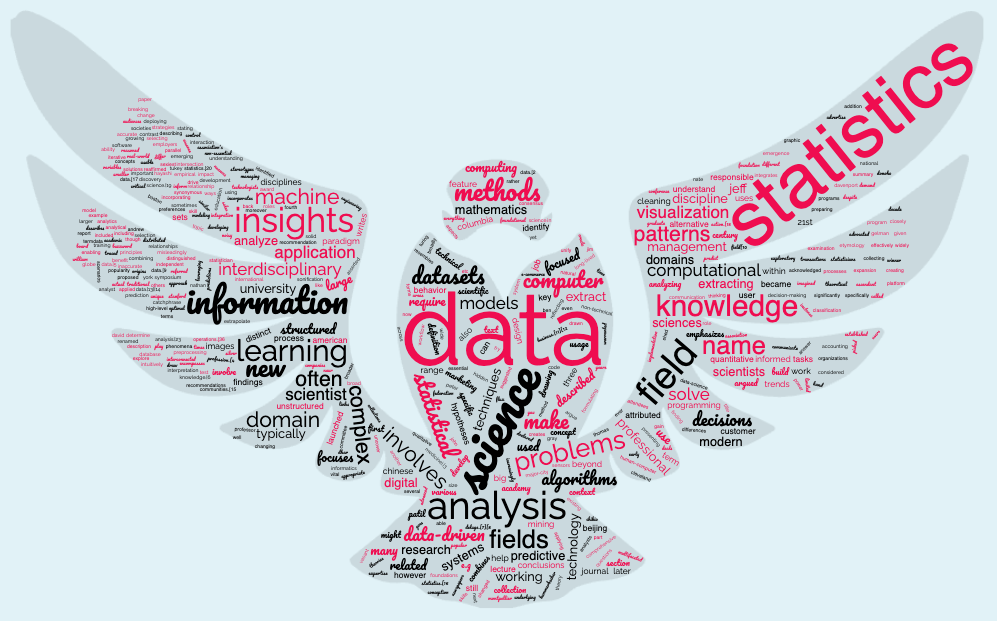

## Project Requirements

Create a program with will perform some text-based data analysis on a user-selected text. 

The user will be presented with three options in a menu:

1. Analyze a local, user-specified file
2. Connect to Project Gutenberg and analyze the U.S. Constitution
3. Connect to Project Gutenberg and analyze the State of the Union Addresses for Abraham Lincoln

The program will analyze the selected text, **remove all punctuation and convert words to lowercase**, and automatically report all of the following measurements:

A. total word count and total number of unique words <br>
B. the average word length, plus minimum and maximum word length<br>
C. the top 10 longest words contained in the text, and how often each was used<br>
D. create a graph showing number of unique words of lengths 1-9 letters long<br>
E. create a word cloud of the top 100 most common words


## Project Restrictions

This project is aimed at improving your coding skills.  Therefore, there are some restrictions:

- You are * **only** * allowed to import 3 specific libraries: **matplotlib.pyplot**, **wordcloud**, and **requests**.  (See below for instructions for how to use the last 2 libraries.). *No other libraries are allowed.*
- The program must use several user-defined functions (at least 3 -- more is probably better.  For example, I ended up with 12 functions). In the cells below, there are some required functions that the auto-grader will test, so make sure that your solution meets those requirements.
- The program must include exception handling for option 1 (user specified file). 
- The program must have a comment at the top of the file that has your name in it (at least), a docstring comment for each function, and preferably some comments elsewhere in your code, describing what each section is doing.

## Sample Output

### Sample Output 1

The program performs text-based data analysis.

Choose from the following options: <br>
1 - Use a user-specified text file <br>
2 - Access the U.S. Constitution from Project Gutenberg <br>
3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg <br>
4 - Quit the program <br>

Enter 1, 2, 3, or 4 to quit. 1 <br>
Enter filename:  sample.txt

There are a total of 20 words in this selection. <br>
There are 9 unique words in this selection. <br>
The average word length is 3.6. <br>
The minimum length is 2 and the maximum length is 6.

The 10 longest words are: <br>
second, found 1 times <br>
first, found 1 times <br>
third, found 1 times <br>
this, found 3 times <br>
line, found 4 times <br>
last, found 1 times <br>
here, found 1 times <br>
the, found 4 times <br>
is, found 4 times <br>

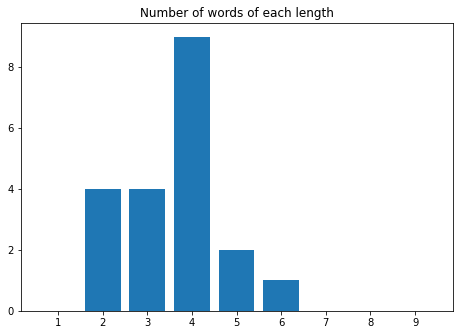

Wordcloud saved to file.

Choose from the following options: <br>
1 - Use a user-specified text file <br>
2 - Access the U.S. Constitution from Project Gutenberg <br>
3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg <br>
4 - Quit the program <br>

Enter 1, 2, 3, or 4 to quit. 4

The wordcloud that was save to a file was this:

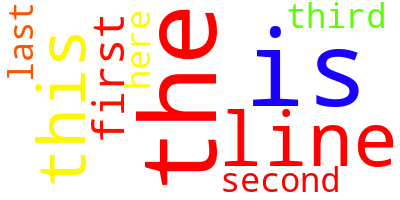

## Let's BEGIN coding!

In [2]:
# Install necessary dependencies
import requests
import matplotlib.pyplot as plot
from wordcloud import WordCloud


### First Step: Set up the menu

In general, as you write programs, you should build good habits.  **Code a few lines, then test that those work as you expect, then repeat.**  I highly recommend first drawing out what you think needs to happen on paper, before you start coding.  Think through what the "flow" of the program is, what happens first, what happens next, and so on. Just write it in words, or draw pictures.
- As you are coding, think through the problem in "chunks".  Maybe those chunks belong in functions?

Maybe start with the menu -- we did that for Project 1, right?  It might help to look back at that code.

#### Write the menu() function here, and be sure to manually test it:

In [35]:
def menu():
        """Display a menu with four options, return the user’s selection as an integer"""
        
        print('The program performs text-based data analysis.')
        print()
        print('Choose from the following options:')
        print('1 - Use a user-specified text file')
        print('2 - Access the U.S. Constitution from Project Gutenberg') 
        print("3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg")
        print('4 - Quit this program.')
        while True:
            choice = input('Enter 1, 2, 3, or 4 to quit. ')
            if choice == '1':
                return 1
            elif choice == '2':
                return 2
            elif choice == '3':
                return 3
            elif choice == '4':
                return 4
                break
            else:
                print('That is not a valid option. Please try again.')
                continue
            
menu()

The program performs text-based data analysis.

Choose from the following options:
1 - Use a user-specified text file
2 - Access the U.S. Constitution from Project Gutenberg
3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg
4 - Quit this program.


Enter 1, 2, 3, or 4 to quit.  4


4

#### Now, test your code with some automated tests:

Once you have written the menu() function above and completed your manual testing, you should try the auto-grader tests in the next cell.  The tests below simulate how a user would select each menu option.  For example, the first test pretends that the user enters the character “1”, and verifies that your menu() function returns the integer 1.

Note that these tests are very close to the actual tests used by the auto-grader, so if your menu() function is passing these tests (so that you see no errors output when you run the cell), your code is likely correct.

__NOTE: If this cell causes an infinite loop click the square icon in the tray above to quickly kill the kernel.  If an infinite loop happens that means that your menu code is not correct and the tests are failing.  When this cell runs without error, your code has pass the auto-tests.__

In [13]:
### BEGIN TESTS
from unittest.mock import patch

def test_menu():
    # Test for input '1'
    with patch('builtins.input', return_value="1"):
        assert menu() == 1, "menu() cannot handle the input of 1 properly, check logic"
        print("USER ENTERS: 1")
        print("RETURNED value of int(1) for answer\n\n")

    # Test for input '2'
    with patch('builtins.input', return_value="2"):
        assert menu() == 2, "menu() cannot handle the input of 2 properly, check logic"
        print("USER ENTERS: 2")
        print("RETURNED value of int(2) for answer\n\n")
        
    # Test for input '3'
    with patch('builtins.input', return_value="3"):
        assert menu() == 3, "menu() cannot handle the input of 3 properly, check logic"
        print("USER ENTERS: 3")
        print("RETURNED value of int(3) for answer\n\n")
        
    # Test for input '4'
    with patch('builtins.input', return_value="4"):
        assert menu() == 4, "menu() cannot handle the input of 4 properly, check logic"
        print("USER ENTERS: 4")
        print("RETURNED value of int(4) for answer\n\n")

    # Test for an invalid input followed by a valid input
    print("simulating a user entering an invalid value, followed by a valid value:\n")
    with patch('builtins.input', side_effect=["5", "1"]):
        assert menu() == 1
        print("USER ENTERS: 1")
        print("RETURNED value of int(1) for answer\n\n")

test_menu()
### END TESTS


The program performs text-based data analysis.

Choose from the following options:
1 - Use a user-specified text file
2 - Access the U.S. Constitution from Project Gutenberg
3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg
4 - Quit this program.
USER ENTERS: 1
RETURNED value of int(1) for answer


The program performs text-based data analysis.

Choose from the following options:
1 - Use a user-specified text file
2 - Access the U.S. Constitution from Project Gutenberg
3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg
4 - Quit this program.
USER ENTERS: 2
RETURNED value of int(2) for answer


The program performs text-based data analysis.

Choose from the following options:
1 - Use a user-specified text file
2 - Access the U.S. Constitution from Project Gutenberg
3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg
4 - Quit this program.
USER ENTERS: 3
RETURNED value of int

### Second Step: Let the user analyze a local file

**Start with the simple, and move towards the complex.**  Start with reading a local text file, assuming the user types the filename correctly.  Once that is working, then put in exception handling, for when the user messes up.  Remember, we did this for Programming Assignment 8 -- this should be helpful!

Hints:
- When you are reading in the local file, you can use a method called .readlines() to read the whole file in at one time, generating a list of strings, where each string is one line.  Try the following code -- print out what is generated, and play with it a little until you understand how it is storing the text.

```
      with open(filename, 'r') as datafile:
         line_list = datafile.readlines()
```

#### Write the `load_localfile` function here, and be sure to manually test it:

In [37]:
def load_localfile():
    ''' prompt user for filename, load data into list of lines, return list '''
    while True:
        file_name = input('Enter filename: ')
        try:
            with open(file_name, 'r') as datafile:
                line_list = datafile.readlines()
            return line_list
        except FileNotFoundError:
            print(f"There is no file named {file_name} in this directory.")
load_localfile()

Enter filename:  g


There is no file named g in this directory.


Enter filename:  sample.txt


['This is the first line.\n',
 'THIS IS THE SECOND LINE.\n',
 'This is the third line.\n',
 'The last line is here.']

#### Now, test your code with some automated tests:

In [38]:
### BEGIN TESTS
from unittest.mock import patch

def test_load_localfile():
    # Test for a valid file input
    with patch('builtins.input', return_value="sample.txt"), \
         patch('builtins.open', return_value=open("sample.txt", "r")):
        assert load_localfile() == ['This is the first line.\n','THIS IS THE SECOND LINE.\n','This is the third line.\n','The last line is here.'], "load_localfile() cannot handle the input of a valid file properly, check logic"
        print("USER ENTERS: sample.txt")
        print("RETURNED content of 'sample.txt' for answer\n\n")

    # Test for an invalid file input followed by a valid file input
    print("simulating a user entering an invalid filename, followed by a valid filename")
    with patch('builtins.input', side_effect=["invalid_file.txt", "sample.txt"]), \
         patch('builtins.open', side_effect=[FileNotFoundError("File not found"), open("sample.txt", "r")]):
        assert load_localfile() == ['This is the first line.\n','THIS IS THE SECOND LINE.\n','This is the third line.\n','The last line is here.']
        print("USER ENTERS: sample.txt after invalid file")
        print("RETURNED content of 'sample.txt' for answer\n\n")

test_load_localfile()
### END TESTS

USER ENTERS: sample.txt
RETURNED content of 'sample.txt' for answer


simulating a user entering an invalid filename, followed by a valid filename
There is no file named invalid_file.txt in this directory.
USER ENTERS: sample.txt after invalid file
RETURNED content of 'sample.txt' for answer




### Third Step: Analyze the text 5 ways

Now, you have a choice as a programmer.  You can approach the rest of the problem in two different ways:

1. One approach (recommended): First, you could concentrate on adding the code to do the 5 step analysis (steps A through E in the Project Requirements above).  Then, you could implement menu options 2 and 3, to connect to Project Gutenberg and get those texts.
2. Another approach (also valid!): First, you could concentrate on connecting to Project Gutenberg and getting the requested texts. Then, you could write the functions to do the 5 step analysis (steps A through E in the Project Requirements above).

I recommend the first approach -- primarily because that gets you the largest number of points for the project most quickly!  And those parts seem more interesting and fun to me as well.  In the rest of the notebook, I'll order things according to the first approach -- but you are welcome to just scroll lower and implement those other functions, if you want to take the second approach.

In this step, where we are going to generate those 5 different requested analyses of the text, we'll give you more general instructions.  There will be a few *required* functions, so that you are able to get immediate feedback from the autograder, but you should also consider adding more functions of your own, when you are solving this problem.  (As long as the required functions work as specified below, it's ok if you have additional functions that they use to get the work done!)

**As you are coding this, remember the restrictions -- you are only allowed to use the three specified libraries.  The reason for this is to help you practice solving problems by coding the solutions yourself, and not always just importing the magic code to do it for you.**

### Third step, part 1:  Data Cleaning

Cleaning up the data is always a necessary step when doing data analysis. The text comes in pretty mangled up!  You want to remove all the punctuation, and make the words lower case. 

Hint: 

One way to do that is to loop through the strings, and use the string method **.replace()**.  It will find all instances of the first character, and replace it with the second.  For example, this code takes each of the strings in *dirty_text* (which is a list of strings) and removes the end-of-line character and the period, and replaces them with a space:
```
    for each_line in dirty_text:
        # replace a bunch of characters
        fixed_text = each_line.replace('\n',' ')  
        fixed_text = fixed_text.replace('.',' ')
```

You'll want to add more things to replace, as you look at the other files.

#### Write the `process_text` function here, and be sure to manually test it:

In [39]:
def process_text(dirty_text):
    ''' remove all punctuation, newlines, and numbers from the text,
        lowercase all of it, return cleaned text as a list of strings '''
    expected_clean_text = []
    for each_line in dirty_text:
        # replace a bunch of characters
        fixed_text = each_line.replace('\n','').replace('(',' ').replace(')',' ').replace('/',' ').replace(';',' ').replace('.',' ').replace('\"',' ').replace('?',' ').replace(',',' ').replace(':',' ').replace('-',' ').replace('!',' ').lower()
        expected_clean_text.append(fixed_text)
    return expected_clean_text


    

# Call your function here to test it.  Does it work correctly?
process_text(["Hello, World!\n",
        "Line with .dots, and: semi-colons; and hyphens - okay?",
        "12345 Mixed with Numbers and \"quotes\"",
        "More! Punctuation? Here: Yes."]) 

['hello  world ',
 'line with  dots  and  semi colons  and hyphens   okay ',
 '12345 mixed with numbers and  quotes ',
 'more  punctuation  here  yes ']

#### Now, test your code with some automated tests:

In [40]:
### BEGIN TESTS
def test_process_text():
    # Test with various punctuations, newlines, and numbers
    dirty_text = [
        "Hello, World!\n",
        "Line with .dots, and: semi-colons; and hyphens - okay?",
        "12345 Mixed with Numbers and \"quotes\"",
        "More! Punctuation? Here: Yes."
    ]
    expected_clean_text = [
        "hello  world ",
        "line with  dots  and  semi colons  and hyphens   okay ",
        "12345 mixed with numbers and  quotes ",
        "more  punctuation  here  yes "
    ]

    result = process_text(dirty_text)
    assert result == expected_clean_text, "Text processing does not match expected clean text"
    print("RETURNED: Correctly cleaned text according to specifications\n\n")

# Run the test function
test_process_text()
### END TESTS

RETURNED: Correctly cleaned text according to specifications




### Third Step, part 2: Data Analysis

Here is where you will need to make some choices, as a programmer! We are required to report on these 5 items:

A. total word count and total number of unique words<br>
B. the average word length, plus minimum and maximum word length<br>
C. the top 10 longest words contained in the text, and how often each was used<br>
D. create a graph showing number of unique words of lengths 1-9 letters long<br>
E. create a word cloud of the top 100 most common words<br>

As promised in Project 1, you have more freedom in this project as to exactly how you want to structure your solution.  However, since immediate feedback helps your learning, we'll specify (and auto-grade) that there is one named function that handles each of the items above.  You will probably also want to share some functionality between each step, and so should write additional helper functions to minimize the amount of code that is copied and pasted.  We will also require one named helper function, as it will make the rest of the project much more straightforward to implement.

**Note on grading**:  The auto-grader will measure that your functions have the correct output.  At the final submission of the project, the Course Facilitators will manually grade your code for quality.  A large amount of copying and pasting of code will lower the code quality part of your grade. 

But before you start working, **be sure to save a copy of your code frequently!**  It's easy to break one part while working on another.  Download a copy of this notebook to your device, in case you end up wanting a backup copy!

HINTS: 

- Some of the functions that we've used before will come in useful here.  You may want to use: len()  .lower()  .split()  .keys() .values() .append() .count()  min()  max()

Farther below, we have each of these 5 required functions listed. However there are a few blank cells here, for you to use to add your own helper functions.  The last cell has the required helper function.  Examine the comments provided, then implement and test this function.

In [ ]:
# you can add more helper functions here

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [42]:
# This helper function is required.  We can do all the other steps easier, if we first
# build a dictionary where the dictionary keys are the individual words 
# and the values are the number of times that word appears (frequencies). 

# HINT:  look at Programming Assignment 8, where you build a similar dictionary!
def build_dict(string_list):
    ''' build a word-frequency dictionary based on the list of strings,
        return the dictionary '''
    my_dict = {}
    my_list = []
    for each_line in string_list:
        my_list += each_line.split()
    for each in my_list:
        if each in my_dict:
            my_dict[each] += 1
        else:
            my_dict[each] = 1
    return my_dict


# Call your function here to test it.  Does it work correctly?
sample_text = [
        "apple banana apple",
        "banana cherry cherry",
        "apple cherry banana apple",
    ]



#### Now, test your code with some automated tests:

In [43]:
### BEGIN TESTS

def test_build_dict():
    # Test with various words and repetitions
    string_list = [
        "apple banana apple",
        "banana cherry cherry",
        "apple cherry banana apple",
    ]
    expected_word_dict = {
        "apple": 4,
        "banana": 3,
        "cherry": 3,
    }

    result = build_dict(string_list)
    assert result == expected_word_dict, "Word frequency dictionary does not match expected dictionary"
    print("RETURNED: Correct word-frequency dictionary according to specifications\n\n")

    # Test with an empty list
    string_list_empty = []
    expected_word_dict_empty = {}
    result_empty = build_dict(string_list_empty)
    assert result_empty == expected_word_dict_empty, "Word frequency dictionary for empty input does not match expected empty dictionary"
    print("RETURNED: Correct word-frequency dictionary for empty input\n\n")

# Run the test function
test_build_dict()
### END TESTS

RETURNED: Correct word-frequency dictionary according to specifications


RETURNED: Correct word-frequency dictionary for empty input




### Part A: Required function to report the total word count and total number of unique words

This function will take a dictonary as an argument, and print results that are formatted exactly as follows (where the numerical results represent the correct values for the dictionary):

```
There are a total of 20 words in this selection.
There are 9 unique words in this selection.
```

#### Write the `report_counts` function here, and be sure to manually test it:

In [44]:
def report_counts(word_dict):
    ''' report on the total word count and total character count '''
    words = 0
    for j in word_dict:
        words += word_dict[j]
    print()    
    print(f'There are a total of {words} words in this selection.')
    print(f'There are {len(word_dict)} unique words in this selection.')
 
oi = {'apple': 4, 'banana': 3, 'cherry': 3, 'halef': 1, 'goiaba': 1}
report_counts(oi)

# Call your function here to test it.  Does it work correctly?
# Add your own code here to test your function - you may want to call 
# the functions that you have already written: load_localfile(), 
# process_text(sample_text), and build_dict(cleaned_text) 


There are a total of 12 words in this selection.
There are 5 unique words in this selection.


#### Now, test your code with some automated tests:

In [45]:
### BEGIN TESTS
from io import StringIO
import sys

def test_report_counts():
    # Save the original standard output
    original_stdout = sys.stdout

    # Test with various word frequencies
    w_dict = {
        "apple": 4,
        "banana": 3,
        "cherry": 3,
    }
    captured_output = StringIO()  # Create a new StringIO object
    sys.stdout = captured_output  # Redirect standard output
    report_counts(w_dict)
    sys.stdout = original_stdout  # Reset standard output to the original
    actual_output = captured_output.getvalue()
    expected_output = (
        "\nThere are a total of 10 words in this selection."
        "\nThere are 3 unique words in this selection.\n"
    )
    assert actual_output == expected_output, f"Reported counts do not match expected counts. Actual: {actual_output!r}, Expected: {expected_output!r}"
    print("RETURNED: Correctly reported total word count and unique word count according to specifications\n\n")

    # Test with an empty dictionary
    w_dict_empty = {}
    captured_output_empty = StringIO()  # Create a new StringIO object
    sys.stdout = captured_output_empty  # Redirect standard output
    report_counts(w_dict_empty)
    sys.stdout = original_stdout  # Reset standard output to the original
    actual_output_empty = captured_output_empty.getvalue()
    expected_output_empty = (
        "\nThere are a total of 0 words in this selection."
        "\nThere are 0 unique words in this selection.\n"
    )
    assert actual_output_empty == expected_output_empty, f"Reported counts for empty input do not match expected counts. Actual: {actual_output_empty!r}, Expected: {expected_output_empty!r}"
    print("RETURNED: Correctly reported total word count and unique word count for empty input\n\n")

# Run the test function
test_report_counts()
### END TESTS

RETURNED: Correctly reported total word count and unique word count according to specifications


RETURNED: Correctly reported total word count and unique word count for empty input




### Part B: Required function to report the average word length, plus minimum and maximum word length

This function will take a dictionary as an argument, and print results that are formatted exactly as follows (where the numerical results represent the correct values for the dictionary):

```
   The average word length is 3.6.
   The minimum length is 2 and the maximum length is 6.
```

#### Write the `report_wordlength` function here, and be sure to manually test it:

In [46]:
def report_wordlength(w_dict):
    ''' report on the average word length, min, and max '''
    average = ''
    count = 0
    for i, key in enumerate(w_dict.keys()):
        average += key
        count += 1
        if i == 0:
            minimum = len(key)
            maximum = len(key)
        else:
            if len(key) < minimum:
                minimum = len(key)
            elif len(key) > maximum:
                maximum = len(key)
                
    # to get only one number after the comma   
    
    final = len(average) / count
    final_string = str(final)

    print(f"\nThe average word length is {final_string[0:3]}.\nThe minimum length is {minimum} and the maximum length is {maximum}.")



  



w_dict2 = {"apple": 1}

w_dict = { "apple": 4,
        "banana": 3,
        "cherry": 3}

report_wordlength(w_dict)

# Call your function here to test it.  Does it work correctly?
# add your testing code here


The average word length is 5.6.
The minimum length is 5 and the maximum length is 6.


#### Now, test your code with some automated tests:

In [47]:
### BEGIN TESTS
import sys
from io import StringIO

def test_report_wordlength():
    # Capture the original standard output
    original_stdout = sys.stdout

    # Redirect standard output to capture print statements
    captured_output = StringIO()
    sys.stdout = captured_output

    # Test with various word frequencies
    w_dict = {
        "apple": 4,
        "banana": 3,
        "cherry": 3,
    }
    report_wordlength(w_dict)
    expected_output = (
        "\nThe average word length is 5.6."
        "\nThe minimum length is 5 and the maximum length is 6.\n"  # Added newline character
    )
    assert captured_output.getvalue() == expected_output, "Reported word lengths do not match expected lengths"

    # Reset the captured output for the next test
    captured_output.seek(0)
    captured_output.truncate()

    # Test with a single word
    w_dict_single = {"apple": 1}
    report_wordlength(w_dict_single)
    expected_output_single = (
        "\nThe average word length is 5.0."
        "\nThe minimum length is 5 and the maximum length is 5.\n"  # Added newline character
    )
    assert captured_output.getvalue() == expected_output_single, "Reported word lengths for single word do not match expected lengths"

    # Reset standard output to the original
    sys.stdout = original_stdout

    print("RETURNED: Correctly reported average, minimum, and maximum word lengths according to specifications\n\n")

# Run the test function
test_report_wordlength()
### END TESTS

RETURNED: Correctly reported average, minimum, and maximum word lengths according to specifications




### Part C: Required function to report the top 10 longest words contained in the text, and how often each was used


This function will take a dictionary as an argument, and print results that are formatted exactly as follows (where the words and numerical results represent the correct values for the dictionary, though the listed order may change):

```
   The 10 longest words are:
   second, found 1 times
   first, found 1 times
   third, found 1 times
   this, found 3 times
   line, found 4 times
   last, found 1 times
   here, found 1 times
   the, found 4 times
   is, found 4 times
```

Hint: 

For the this analysis, this will take some thought and problem solving.  There are several ways to solve it. Spend some time working on it, but if you get frustrated, move on to D and E, then come back to this one.

Try different things.  Test frequently, use the debugger, print things out.

#### Write the `report_10longest` function here, and be sure to manually test it:

In [30]:
def conditions(word):
    ''' to sort by two differents conditions, length and alphabetical '''
    alphabetical = [chr(i) for i in range(ord('a'), ord('z') + 1)]
    letter = word[0][0]
    count = 100
    for index, i in enumerate(alphabetical):
        count -= 1
        if i == letter:
            number = count
            break
        else:
            number = 0
    return len(word[0]), number
      
def report_10longest(w_dict):
    ''' report the 10 longest words in the dictionary, and their frequency '''
    test_dict_list = list(w_dict.items())
    test_dict_list.sort(key = conditions)
    res = {ele[0] : ele[1] for ele in test_dict_list}
    my_list2 = []
    my_list = []
    for keys, value in res.items():
        my_list.append(keys)
        my_list2.append(value)    
    print('\nThe 10 longest words are:')
    if len(my_list) >= 10:
        for i in range(1, 11):
            print(f'{my_list[i*(-1)]}, found {my_list2[i*(-1)]} times')
    else:
        for i in range(0, len(my_list) + 1):
            print(f'{my_list[i*(-1)]}, found {my_list2[i*(-1)]} times')
    
test_dict = {"apple": 2,
        "banana": 3,
        "cherry": 1,
        "dragonfruit": 1,
        "elderberry": 2,
        "fig": 3,
        "grape": 1,
        "honeydew": 1,
        "kiwi": 1,
        "lemon": 2,
        "mango": 3,}


report_10longest(test_dict)
    
# Call your function here to test it.  Does it work correctly?
# add your code here
# YOUR CODE HERE




The 10 longest words are:
dragonfruit, found 1 times
elderberry, found 2 times
honeydew, found 1 times
banana, found 3 times
cherry, found 1 times
apple, found 2 times
grape, found 1 times
lemon, found 2 times
mango, found 3 times
kiwi, found 1 times


#### Now, test your code with some automated tests:

In [35]:
### BEGIN TESTS
import sys
from io import StringIO

def test_report_10longest():
    # Capture the original standard output
    original_stdout = sys.stdout

    # Redirect standard output to capture print statements
    captured_output = StringIO()
    sys.stdout = captured_output

    # Test with various word frequencies
    w_dict = {
        "apple": 2,
        "banana": 3,
        "cherry": 1,
        "dragonfruit": 1,
        "elderberry": 2,
        "fig": 3,
        "grape": 1,
        "honeydew": 1,
        "kiwi": 1,
        "lemon": 2,
        "mango": 3,
    }
    report_10longest(w_dict)
    expected_output = (
        "\nThe 10 longest words are:"
        "\ndragonfruit, found 1 times"
        "\nelderberry, found 2 times"
        "\nhoneydew, found 1 times"
        "\nbanana, found 3 times"
        "\ncherry, found 1 times"
        "\napple, found 2 times"
        "\ngrape, found 1 times"
        "\nlemon, found 2 times"
        "\nmango, found 3 times"
        "\nkiwi, found 1 times"
    )
    actual_output = captured_output.getvalue().strip()
    assert actual_output == expected_output.strip(), f"Reported 10 longest words do not match expected words. Actual: {actual_output!r}, Expected: {expected_output!r}"

    # Reset standard output to the original
    sys.stdout = original_stdout

    print("RETURNED: Correctly reported 10 longest words and their frequencies according to specifications\n\n")

# Run the test function
test_report_10longest()
### END TESTS

RETURNED: Correctly reported 10 longest words and their frequencies according to specifications




### Part D: Required function to create a graph showing number of unique words of lengths 1-9 letters long

This function will take a dictionary as an argument, and will create a graph showing the number of unique words that have lengths between 1 letter long and 9 letters long (inclusive).

For the sample.txt file, ther result should look like this (including the title of the graph):
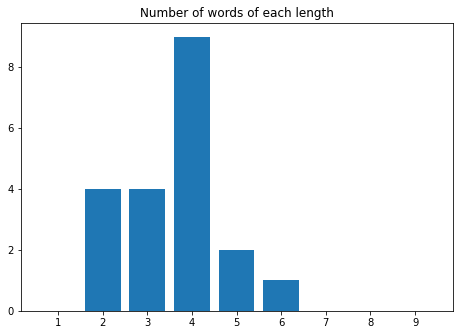

Hint:

Remember that we created a graph in Project 1.  A similar approach may work here.

#### Write the `graph_word_lengths` function here, and be sure to manually test it:

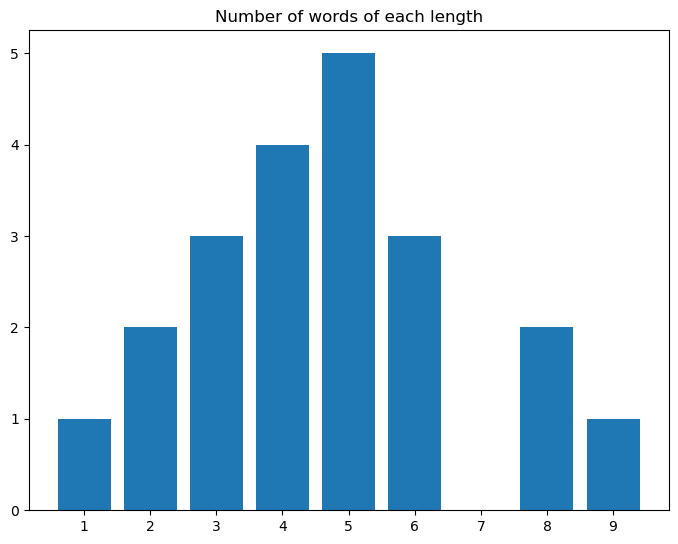

In [7]:
def graph_word_lengths(w_dict):
    ''' create a graph showing number of unique words of lengths 1 to 9 letters long '''
    n1 = n2 = n3 = n4 = n5 = n6 = n7 = n8 = n9 = 0
    test_dict_list = list(w_dict.items())
    for i in range(0, len(test_dict_list)):
        if len(test_dict_list[i][0]) == 1:
            n1 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 2:
            n2 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 3:
            n3 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 4:
            n4 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 5:
            n5 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 6:
            n6 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 7:
            n7 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 8:
            n8 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 9:
            n9 = test_dict_list[i][1]


    figure = plot.figure()
    axes = figure.add_axes([0,0,1,1]) 
    labels = ['1','2','3','4','5','6','7','8','9'] 
    values = [n1, n2,n3,n4,n5,n6,n7,n8,n9] 
    axes.bar(labels,values) 
    axes.set_title('Number of words of each length')
    plot.show
    
w_dict = {
        "a": 1,
        "it": 2,
        "dog": 3,
        "cats": 4,
        "apple": 5,
        "banana": 3,
        "cherries": 2,
        "pineapple": 1,
    }

graph_word_lengths(w_dict)

#### Now, test your code with some automated tests:

In [8]:
### BEGIN TESTS
from unittest.mock import MagicMock, patch

def test_graph_word_lengths():
    # Sample word dictionary
    w_dict = {
        "a": 1,
        "it": 2,
        "dog": 3,
        "cats": 4,
        "apple": 5,
        "banana": 3,
        "cherries": 2,
        "pineapple": 1,
    }

    # Corrected expected values for each word length
    expected_values = [1, 2, 3, 4, 5, 3, 0, 2, 1]

    # Mocking the axes object
    with patch('matplotlib.pyplot.figure') as mocked_figure:
        mocked_axes = MagicMock()
        mocked_figure.return_value.add_axes.return_value = mocked_axes

        # Call the function to be tested
        graph_word_lengths(w_dict)

        # Assert that the mocked_axes.bar function was called with the correct arguments
        labels, values = ['1','2','3','4','5','6','7','8','9'], expected_values
        mocked_axes.bar.assert_called_once_with(labels, values)

        print("RETURNED: Correctly graphed word lengths according to specifications\n\n")

# Run the test function
test_graph_word_lengths()
### END TESTS

RETURNED: Correctly graphed word lengths according to specifications




### Part E: Required function to create a word cloud of the top 100 most common words

This function will take a dictionary as an argument, and word cloud of the top 100 most common words, and save the wordcloud to a file.  You can open the file by double-clicking on the file after it is created.

This can be done in only 3 lines! You can generate a wordcloud with just these lines of code: 
```
    wordcloud = WordCloud(colormap='prism', background_color='white', max_words=100)
    wordcloud = wordcloud.fit_words(w_dict)
    wordcloud = wordcloud.to_file('wordcloud.png')
```

For the sample.txt file, your wordcloud should look SIMILAR to this (the words may not be exactly the same color or in the same location, but the image should be roughly similar):

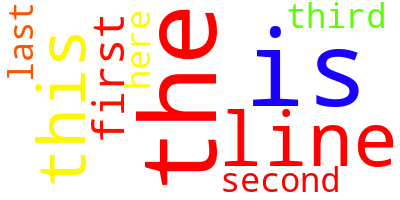

#### Write the `save_wordcloud` function here, and be sure to manually test it:

In [9]:
def save_wordcloud(w_dict):
    ''' save a wordcloud figure for the dictionary '''
    wordcloud = WordCloud(colormap='prism', background_color='white', max_words=100)
    wordcloud = wordcloud.fit_words(w_dict)
    wordcloud = wordcloud.to_file('wordcloud.png')
    return 'Wordcloud saved to file.'
    
    
w_dict = {
        "apple": 5,
        "banana": 3,
        "cherries": 2,
    }

save_wordcloud(w_dict)

'Wordcloud saved to file.'

#### Now, test your code with some automated tests:

In [10]:
### BEGIN TESTS
def test_save_wordcloud():
    # Sample word dictionary
    w_dict = {
        "apple": 5,
        "banana": 3,
        "cherries": 2,
    }

    # Mocking the WordCloud class
    with patch.object(WordCloud, 'fit_words') as mocked_fit_words, \
         patch.object(WordCloud, 'to_file') as mocked_to_file:

        # Call the function to be tested
        save_wordcloud(w_dict)

        # Assert that the mocked_fit_words function was called with the correct argument
        mocked_fit_words.assert_called_once_with(w_dict)

        # Assert that the mocked_to_file function was called with the correct argument
        mocked_to_file.assert_called_once_with('wordcloud.png')

        print("RETURNED: Correctly created and saved wordcloud according to specifications\n\n")

# Run the test function
test_save_wordcloud()
### END TESTS

AssertionError: Expected 'to_file' to be called once. Called 0 times.



## Whew!  You're doing great and close to being finished with this Project.  **Be sure to save a copy of your solution before moving on to the next part!**



### Fourth Step: Add the functionality for the second menu option, to download the U.S. Constitution from Project Gutenberg and analyze it

We can directly connect to the Gutenberg Project website, using a package called requests.  This package will connect to the website, and download the file in the URL.

Then you can connect to Project Gutenberg, download the Constitution, and convert the text into a list of strings (each string is one line), with just a few lines of code:
```
    full_text = requests.get('https://www.gutenberg.org/cache/epub/5/pg5.txt').text
    # take this big block of text and convert to a list of strings, one line per string
    text_list = full_text.split('\n') 
    # remove first 83 lines and end on line 676
    final_list = text_list[83:677]
```

Note that this file has a bunch of unrelated text at the start (83 lines worth!) and then also a ton of unrelated stuff at the end (we want to stop at line 677) -- that slice operator just selects what we want to use:  the text of the U.S. Constitution.

Use the code given above to write a function that will take no arguments, but will instead connected to Project Gutenberg to gather the requested text, and return a list of strings that contains the text.

#### Write the `load_gutenberg_constitution` function here, and be sure to manually test it:

In [57]:
def load_gutenberg_constitution():
    ''' load data from Project Gutenberg into a list of lines, return list '''
    full_text = requests.get('https://www.gutenberg.org/cache/epub/5/pg5.txt').text
    # take this big block of text and convert to a list of strings, one line per string
    text_list = full_text.split('\n') 
    # remove first 83 lines and end on line 676
    final_list = text_list[83:677]
    return final_list
    

#### Now, test your code with some automated tests.  This test does not actually contect to the website, but instead tests that you are processing the expected test for the right number of lines, etc.

In [59]:
### BEGIN TESTS
from unittest.mock import patch
import requests

def test_load_gutenberg_constitution():
    # Sample content for testing
    sample_content = "Line1\n" * 83 + "Constitution Text\n" * 594 + "Line2\n" * 100

    # Mocking the requests.get call to return the sample content
    class MockResponse:
        def __init__(self, text):
            self.text = text

    with patch.object(requests, 'get', return_value=MockResponse(sample_content)):
        result = load_gutenberg_constitution()
        assert len(result) == 594, "Number of lines returned is not correct"
        assert all(line == "Constitution Text" for line in result), "Content of lines does not match expected content"
        print("RETURNED: Constitution Text for all lines within the specified range\n\n")

# Run the test function
test_load_gutenberg_constitution()
### END TESTS

RETURNED: Constitution Text for all lines within the specified range




### Fifth Step: Add the functionality for the third menu option, to download from Project Gutenberg all 4 State of the Union speeches from President Abraham Lincoln.

This function will take a little more exploration to complete.  The State of the Union Address text can be found on the Gutenberg Project website. Do a search for "state of the union address", choose Abraham Lincoln, click on the link for "Plain Text UTF-8", and then copy the url -- that is what you want to put into the requests.get() line.  

You will then need to look through the file and figure out which lines to keep and which to toss.  One way to do it is to save the file manually, open it in Jupyter notebook -- which will number the lines for you!

#### Write the `load_gutenberg_lincoln_SOTUs` function here, and be sure to manually test it:

In [31]:
from unittest.mock import patch
import requests

def load_gutenberg_lincoln_SOTUs():
    ''' load data from Project Gutenberg into a list of lines, return list '''
    full_text = requests.get('https://www.gutenberg.org/cache/epub/5024/pg5024.txt').text
    # take this big block of text and convert to a list of strings, one line per string
    text_list = full_text.split('\n')
    final_list = text_list[771:3585]
    return final_list
load_gutenberg_lincoln_SOTUs()
# Note that no automated tests are provided for this function -- When you are doing
# the data cleaning, it is a judgement call on your part!  Not everyone will keep the
# same number of lines, so autograding is not feasable.  Do your best, and run
# thorough tests.  This part will be manually graded.

['State of the Union Address\r',
 'Abraham Lincoln\r',
 'December 1, 1862\r',
 '\r',
 'Fellow-Citizens of the Senate and House of Representatives:\r',
 '\r',
 'Since your last annual assembling another year of health and bountiful\r',
 'harvests has passed, and while it has not pleased the Almighty to bless\r',
 'us with a return of peace, we can but press on, guided by the best\r',
 'light He gives us, trusting that in His own good time and wise way all\r',
 'will yet be well.\r',
 '\r',
 'The correspondence touching foreign affairs which has taken place\r',
 'during the last year is herewith submitted, in virtual compliance with\r',
 'a request to that effect made by the House of Representatives near the\r',
 'close of the last session of Congress. If the condition of our\r',
 'relations with other nations is less gratifying than it has usually\r',
 'been at former periods, it is certainly more satisfactory than a nation\r',
 'so unhappily distracted as we are might reasonably have a

### Last Step: Pulling it all together in main()

Your main() function should allow your program to generate the sample output shown.  You shoudl use the functions that you created above.  For example, you want to use the menu() function to display the menu, then take the action that the user requests (and continue to loop until they choose 4 to exit).  Once they choose a text to analyze, your program should automatically perform all the analyses (from A to E).  Use the other functions that you wrote!

You will need to add a few lines of code to main() that are not your already-written functions ... but there should not be too many lines that are not function calls.

#### Write your main() function so that it meets the requirements above:

In [11]:
import requests
import matplotlib.pyplot as plot
from wordcloud import WordCloud

def menu():
        """Display a menu with four options, return the user’s selection as an integer"""
        
        print('The program performs text-based data analysis.')
        print()
        print('Choose from the following options:')
        print('1 - Use a user-specified text file')
        print('2 - Access the U.S. Constitution from Project Gutenberg') 
        print("3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg")
        print('4 - Quit this program.')
        while True:
            choice = input('Enter 1, 2, 3, or 4 to quit. ')
            if choice == '1':
                return 1
            elif choice == '2':
                return 2
            elif choice == '3':
                return 3
            elif choice == '4':
                return 4
                break
            else:
                print('That is not a valid option. Please try again.')
                continue
    
    
def load_localfile():
    ''' prompt user for filename, load data into list of lines, return list '''
    while True:
        file_name = input('Enter filename: ')
        try:
            with open(file_name, 'r') as datafile:
                line_list = datafile.readlines()
            return line_list
        except FileNotFoundError:
            print(f"There is no file named {file_name} in this directory.")

            

def process_text(dirty_text):
    ''' remove all punctuation, newlines, and numbers from the text,
        lowercase all of it, return cleaned text as a list of strings '''
    expected_clean_text = []
    for each_line in dirty_text:
        # replace a bunch of characters
        fixed_text = each_line.replace('\n','').replace('(',' ').replace(')',' ').replace('/',' ').replace(';',' ').replace('.',' ').replace('\"',' ').replace('?',' ').replace(',',' ').replace(':',' ').replace('-',' ').replace('!',' ').lower()
        expected_clean_text.append(fixed_text)
    return expected_clean_text



def build_dict(string_list):
    ''' build a word-frequency dictionary based on the list of strings,
        return the dictionary '''
    my_dict = {}
    my_list = []
    for each_line in string_list:
        my_list += each_line.split()
    for each in my_list:
        if each in my_dict:
            my_dict[each] += 1
        else:
            my_dict[each] = 1
    return my_dict



def report_counts(word_dict):
    ''' report on the total word count and total character count '''
    words = 0
    for j in word_dict:
        words += word_dict[j]
    print()    
    print(f'There are a total of {words} words in this selection.')
    print(f'There are {len(word_dict)} unique words in this selection.')
    
    
    
def report_wordlength(w_dict):
    ''' report on the average word length, min, and max '''
    average = ''
    count = 0
    for i, key in enumerate(w_dict.keys()):
        average += key
        count += 1
        if i == 0:
            minimum = len(key)
            maximum = len(key)
        else:
            if len(key) < minimum:
                minimum = len(key)
            elif len(key) > maximum:
                maximum = len(key)
                
    # to get only one number after the comma   
    
    final = len(average) / count
    final_string = str(final)

    print(f"\nThe average word length is {final_string[0:3]}.\nThe minimum length is {minimum} and the maximum length is {maximum}.")
    
    
    
def conditions(word):
    ''' to sort by two differents conditions, length and alphabetical '''
    alphabetical = [chr(i) for i in range(ord('a'), ord('z') + 1)]
    letter = word[0][0]
    count = 100
    for index, i in enumerate(alphabetical):
        count -= 1
        if i == letter:
            number = count
            break
        else:
            number = 0
    return len(word[0]), number
    
      
def report_10longest(w_dict):
    ''' report the 10 longest words in the dictionary, and their frequency '''
    test_dict_list = list(w_dict.items())
    test_dict_list.sort(key = conditions)
    res = {ele[0] : ele[1] for ele in test_dict_list}
    my_list2 = []
    my_list = []
    for keys, value in res.items():
        my_list.append(keys)
        my_list2.append(value)    
    print('\nThe 10 longest words are:')
    if len(my_list) >= 10:
        for i in range(1, 11):
            print(f'{my_list[i*(-1)]}, found {my_list2[i*(-1)]} times')
    else:
        for i in range(0, len(my_list) + 1):
            print(f'{my_list[i*(-1)]}, found {my_list2[i*(-1)]} times')
        
        

def graph_word_lengths(w_dict):
    ''' create a graph showing number of unique words of lengths 1 to 9 letters long '''
    n1 = n2 = n3 = n4 = n5 = n6 = n7 = n8 = n9 = 0
    test_dict_list = list(w_dict.items())
    for i in range(0, len(test_dict_list)):
        if len(test_dict_list[i][0]) == 1:
            n1 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 2:
            n2 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 3:
            n3 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 4:
            n4 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 5:
            n5 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 6:
            n6 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 7:
            n7 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 8:
            n8 = test_dict_list[i][1]
        elif len(test_dict_list[i][0]) == 9:
            n9 = test_dict_list[i][1]


    figure = plot.figure()
    axes = figure.add_axes([0,0,1,1]) 
    labels = ['1','2','3','4','5','6','7','8','9'] 
    values = [n1, n2,n3,n4,n5,n6,n7,n8,n9] 
    axes.bar(labels,values) 
    axes.set_title('Number of words of each length')
    plot.show
    
    
    
def save_wordcloud(w_dict):
    ''' save a wordcloud figure for the dictionary '''
    wordcloud = WordCloud(colormap='prism', background_color='white', max_words=100)
    wordcloud = wordcloud.fit_words(w_dict)
    wordcloud = wordcloud.to_file('wordcloud.png')
    return 'Wordcloud saved to file.'
    
    

def load_gutenberg_constitution():
    ''' load data from Project Gutenberg into a list of lines, return list '''
    full_text = requests.get('https://www.gutenberg.org/cache/epub/5/pg5.txt').text
    # take this big block of text and convert to a list of strings, one line per string
    text_list = full_text.split('\n') 
    # remove first 83 lines and end on line 676
    final_list = text_list[83:677]
    return final_list


def load_gutenberg_lincoln_SOTUs():
    ''' load data from Project Gutenberg into a list of lines, return list '''
    full_text = requests.get('https://www.gutenberg.org/cache/epub/5024/pg5024.txt').text
    # take this big block of text and convert to a list of strings, one line per string
    text_list = full_text.split('\n')
    final_list = text_list[771:3585]
    return final_list

In [14]:
def main():
    #showing the menu
    choice = 0
    while choice != 4:
        choice = menu()
        # getting answer from the user
        if choice == 1:
            # loading the file
            get_file = load_localfile()
            # cleaning the file
            process = process_text(get_file)
            # creating a dictionary 
            build = build_dict(process)
            # analysing from the dictionary created
            # total words and unique words
            total_words = report_counts(build)
            # average, minimum length and maximum length
            average = report_wordlength(build)
            # the 10 longest words
            longest_word = report_10longest(build)
            # graph showing number of unique words of lengths 1 to 9 letters long
            graph = graph_word_lengths(build)
            # wordcloud figure
            wordcloud = save_wordcloud(build)
            print(wordcloud)
        elif choice == 2:
            # loading the file
            get_file = load_gutenberg_constitution()
            # cleaning the file
            process = process_text(get_file)
            # creating a dictionary 
            build = build_dict(process)
            # analysing from the dictionary created
            # total words and unique words
            total_words = report_counts(build)
            # average, minimum length and maximum length
            average = report_wordlength(build)
            # the 10 longest words
            longest_word = report_10longest(build)
            # graph showing number of unique words of lengths 1 to 9 letters long
            graph = graph_word_lengths(build)
            # wordcloud figure
            wordcloud = save_wordcloud(build)
            print(wordcloud)
        elif choice == 3:
            # loading the file
            get_file = load_gutenberg_lincoln_SOTUs()
            # cleaning the file
            process = process_text(get_file)
            # creating a dictionary 
            build = build_dict(process)
            # analysing from the dictionary created
            # total words and unique words
            total_words = report_counts(build)
            # average, minimum length and maximum length
            average = report_wordlength(build)
            # the 10 longest words
            longest_word = report_10longest(build)
            # graph showing number of unique words of lengths 1 to 9 letters long
            graph = graph_word_lengths(build)
            # wordcloud figure
            wordcloud = save_wordcloud(build)
            print(wordcloud)





    
        

#### Execute this cell to call your main function, and test it thoroughly.

The program performs text-based data analysis.

Choose from the following options:
1 - Use a user-specified text file
2 - Access the U.S. Constitution from Project Gutenberg
3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg
4 - Quit this program.


Enter 1, 2, 3, or 4 to quit.  3



There are a total of 23995 words in this selection.
There are 3914 unique words in this selection.

The average word length is 7.0.
The minimum length is 1 and the maximum length is 16.

The 10 longest words are:
constitutionally, found 1 times
indiscriminately, found 1 times
misunderstanding, found 1 times
misapprehensions, found 1 times
responsibilities, found 1 times
unenforceability, found 1 times
dissatisfaction, found 2 times
indemnification, found 1 times
inconsiderately, found 1 times
insubordination, found 1 times
Wordcloud saved to file.
The program performs text-based data analysis.

Choose from the following options:
1 - Use a user-specified text file
2 - Access the U.S. Constitution from Project Gutenberg
3 - Access all 4 of Abraham Lincoln's State of the Union speeches from Project Gutenberg
4 - Quit this program.


Enter 1, 2, 3, or 4 to quit.  4


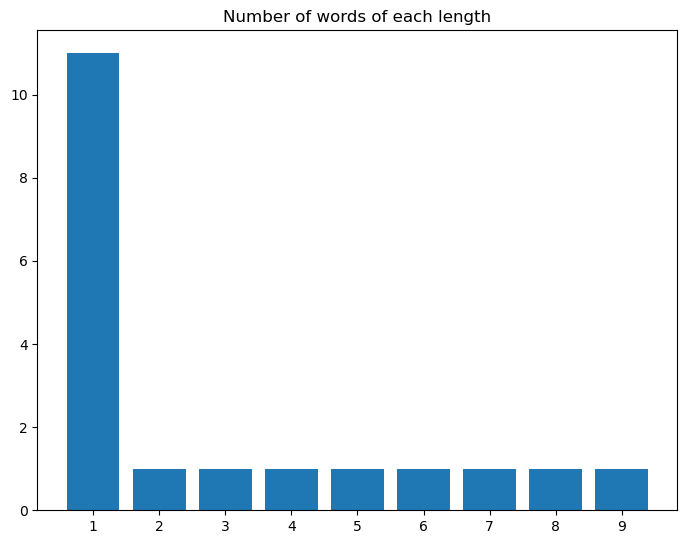

In [20]:
# Executethis cell to call your main function, and test it thoroughly.
main()

#### An important note on autotesting the program associated with the main() function:

The decisions we make while solving problems with programming are similar to many of the decisions we make in life, often with no one correct answer, but instead require analysis of the tradeoffs among the possible answers and careful consideration of the context or environment they exist in.  Testing code is no stranger to this, and with that said, autotesting the function associated with our main program comes down to the tradeoff between the complexity of trying to automate the multiple side effects associated with a number of functions that it coordinates the execution for (`report_counts`, `report_10longest`, and so on ... ) versus the easy and non-complex manual testing that could be done given the relatively simple nature of the main program's code itself.  Therefore, the course facilitators will manually grade your main() function, and ensure that it meets the requirements.  The rubric (grading guide) used by the course facilitators is shown here.  Please check that you have met all the requirements below – then follow the instructions [here](https://www.coursera.org/learn/ball-state-univeristy-introduction-to-programming/assignment-submission/CaNnR/submit-project-2) to submit your final version of the project.